<a href="https://colab.research.google.com/github/Prezii/Project/blob/main/Waveform_Data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Colaboratory notebook

In [1]:
!pip install PyDrive

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

In [3]:
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

In [4]:
downloaded = drive.CreateFile({'id':"1eggTF4aMdUmNRACeHQIuibcckoixnvM6"})   # replace the id with id of file you want to access
downloaded.GetContentFile('tremor_events-2009-10-01T00_00_00-2017-07-31T23_59_59.csv')        # replace the file name with your file

In [6]:
import pandas as pd
import numpy as np
data = pd.read_csv('tremor_events-2009-10-01T00_00_00-2017-07-31T23_59_59.csv')

In [7]:
data.head()

,lat,lon,depth,starttime,energy,duration
0,39.910,-122.870,40.0,2015-07-14 02:27:30,0.0,None
1,42.293,-123.305,36.2,2010-02-06 21:07:30,0.0,None
2,41.020,-122.780,20.0,2011-06-03 16:22:30,0.0,None
3,44.800,-123.155,53.0,2011-06-08 11:15:00,0.0,None
4,48.415,-123.875,54.0,2011-08-25 07:00:00,0.0,None


In [8]:
start_list= data.loc[:,"starttime"]
starttime_ls= start_list.to_numpy()
print(starttime_ls)

[' 2015-07-14 02:27:30' ' 2010-02-06 21:07:30' ' 2011-06-03 16:22:30' ...
 ' 2017-07-31 22:12:30' ' 2017-07-31 22:20:00' ' 2017-07-31 22:37:30']


##Obspy

In [9]:
#Install obspy
!pip install -U obspy
import obspy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [10]:
from obspy.clients.fdsn import Client
from obspy import UTCDateTime

In [11]:
 #Additional packages
import matplotlib.pyplot as plt

##IRIS metadata

In this part we are goint to use IRIS metadata for NLLB and PGC stations

In [12]:
client = Client("IRIS")
network = "CN" #Canadian National Seismograph Network
station = "PGC"
location="*"
channel= "BHE"

In [13]:
starttime= UTCDateTime(2015, 7, 14, 22, 24, 57, 570000) 
endtime = starttime + 300 # 5 min = 300 sec

In [14]:
#starttime=starttime, endtime=endtime,
inv = client.get_stations(network=network, station=station, channel=channel,
                          level="response")

print(inv)

Inventory created at 2022-08-23T19:29:14.232000Z
	Created by: IRIS WEB SERVICE: fdsnws-station | version: 1.1.48
		    http://service.iris.edu/fdsnws/station/1/query?network=CN&station=P...
	Sending institution: IRIS-DMC (IRIS-DMC)
	Contains:
		Networks (1):
			CN
		Stations (1):
			CN.PGC (Sidney, BC, CA)
		Channels (6):
			CN.PGC..BHE (6x)


In [15]:
st = client.get_waveforms(network=network, station = station, location = location, channel = channel , starttime=starttime, endtime=endtime)
print(st) 

1 Trace(s) in Stream:
CN.PGC..BHE | 2015-07-14T22:24:57.575000Z - 2015-07-14T22:29:57.550000Z | 40.0 Hz, 12000 samples


##Plot

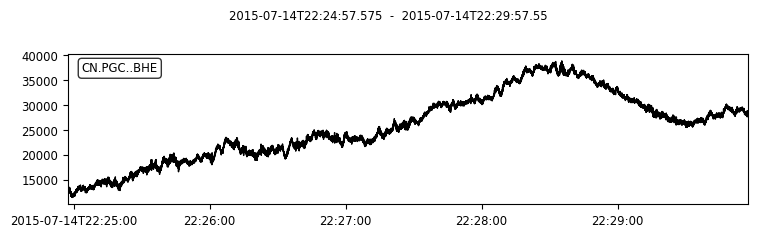

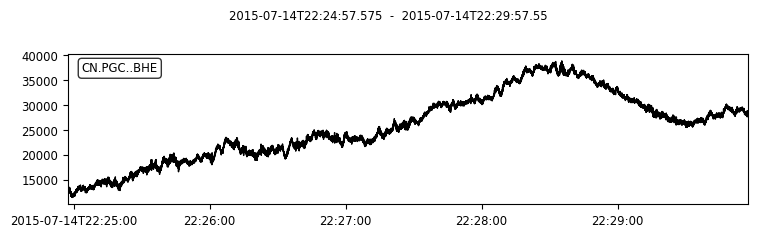

In [16]:
tr = st[0]
tr.plot()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: MatplotlibDeprecationWarning: Automatic legend placement (loc='best') not implemented for figure legend. Falling back on 'upper right'. This will raise an exception in 3.3.
  # Remove the CWD from sys.path while we load stuff.


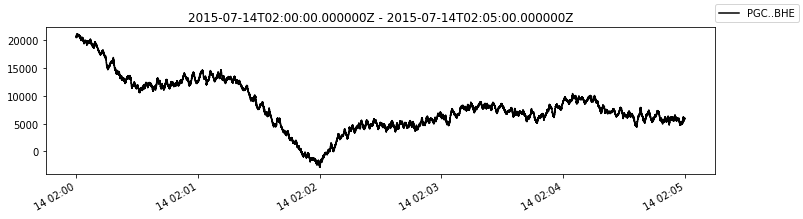

In [82]:
start_time = tr.stats.starttime
end_time = tr.stats.endtime

fig, ax = plt.subplots(figsize=(12, 3))

ax.plot(tr.times("matplotlib"), tr.data, color="0", label = f"{tr.stats.station}..{tr.stats.channel}")
ax.xaxis_date()
fig.autofmt_xdate()

fig.legend(loc="best")
plt.title(f"{start_time} - {end_time}")
plt.show()

https://docs.obspy.org/packages/autogen/obspy.clients.fdsn.client.Client.get_waveforms.html

In [18]:
starttime_ls[0]

' 2015-07-14 02:27:30'

In [19]:
def fun_starttime(ls):
  date=[]
  
  #Transformation to better adaptation of starttime in the IRIS database,
  #as result, it is obtenied an array of str 
  for i in range(len(ls)):
    if ls[i] !=" " and ls[i] !=":":
      date.append(ls[i])
    elif ls[i] == " " and i !=0:
      date.append("T")
    elif ls[i] ==":":
      break
  
  #Concatenation of arr of str
  date_st = ""
  for i in range(len(date)):
    date_st += date[i]

  return date_st

In [20]:
new_startime_ls = []
for i in range(len(starttime_ls)):
  new_startime_ls.append(fun_starttime(starttime_ls[i]))

In [21]:
print(len(starttime_ls),len(new_startime_ls))
new_startime_ls_np = np.array(new_startime_ls)

293788 293788


In [62]:
new_startime_ls_np

array(['2015-07-14T02', '2010-02-06T21', '2011-06-03T16', ...,
       '2017-07-31T22', '2017-07-31T22', '2017-07-31T22'], dtype='<U13')

In [67]:
starttime= UTCDateTime(new_startime_ls_np[0])
endtime = starttime + 300 # 5 min = 300 sec

st = client.get_waveforms(network=network, station = station, location = location, channel = channel , starttime=starttime, endtime=endtime,attach_response=True)
 


In [79]:
st

1 Trace(s) in Stream:
CN.PGC..BHE | 2015-07-14T02:00:00.000000Z - 2015-07-14T02:05:00.000000Z | 40.0 Hz, 12001 samples

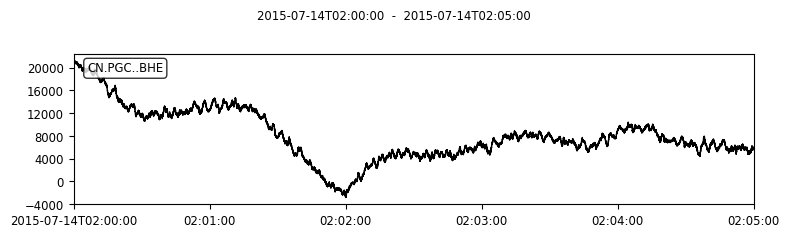

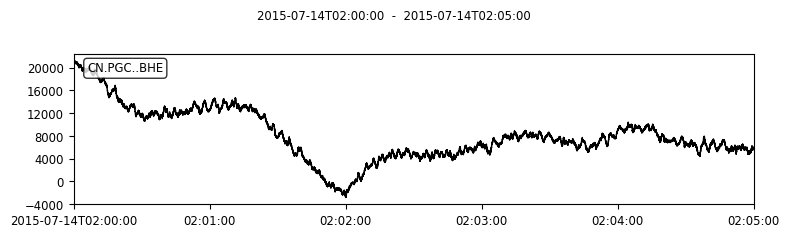

In [80]:
len(st)
tr = st[0]
st.plot()

In [81]:
tr.stats

               network: CN
               station: PGC
              location: 
               channel: BHE
             starttime: 2015-07-14T02:00:00.000000Z
               endtime: 2015-07-14T02:05:00.000000Z
         sampling_rate: 40.0
                 delta: 0.025
                  npts: 12001
                 calib: 1.0
_fdsnws_dataselect_url: http://service.iris.edu/fdsnws/dataselect/1/query
               _format: MSEED
                 mseed: AttribDict({'dataquality': 'M', 'number_of_records': 5, 'encoding': 'STEIM2', 'byteorder': '>', 'record_length': 4096, 'filesize': 20480})
            processing: ['ObsPy 1.3.0: trim(endtime=UTCDateTime(2015, 7, 14, 2, 5)::fill_value=None::nearest_sample=True::pad=False::starttime=UTCDateTime(2015, 7, 14, 2, 0))']
              response: Channel Response
	From m/s (velocity in meters per second) to counts (digital counts)
	Overall Sensitivity: 5.09133e+09 defined at 0.100 Hz
	6 stages:
		Stage 1: PolesZerosResponseStage from m/s to V, ga